In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# as we can see there are some ? present in our dataset. I am going to replace those with NAN value

question_marks = ['collision_type', 'property_damage', 'police_report_available']
data[question_marks] = data[question_marks].replace('?', np.nan)


In [7]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# Filling up those null values using mode function

data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

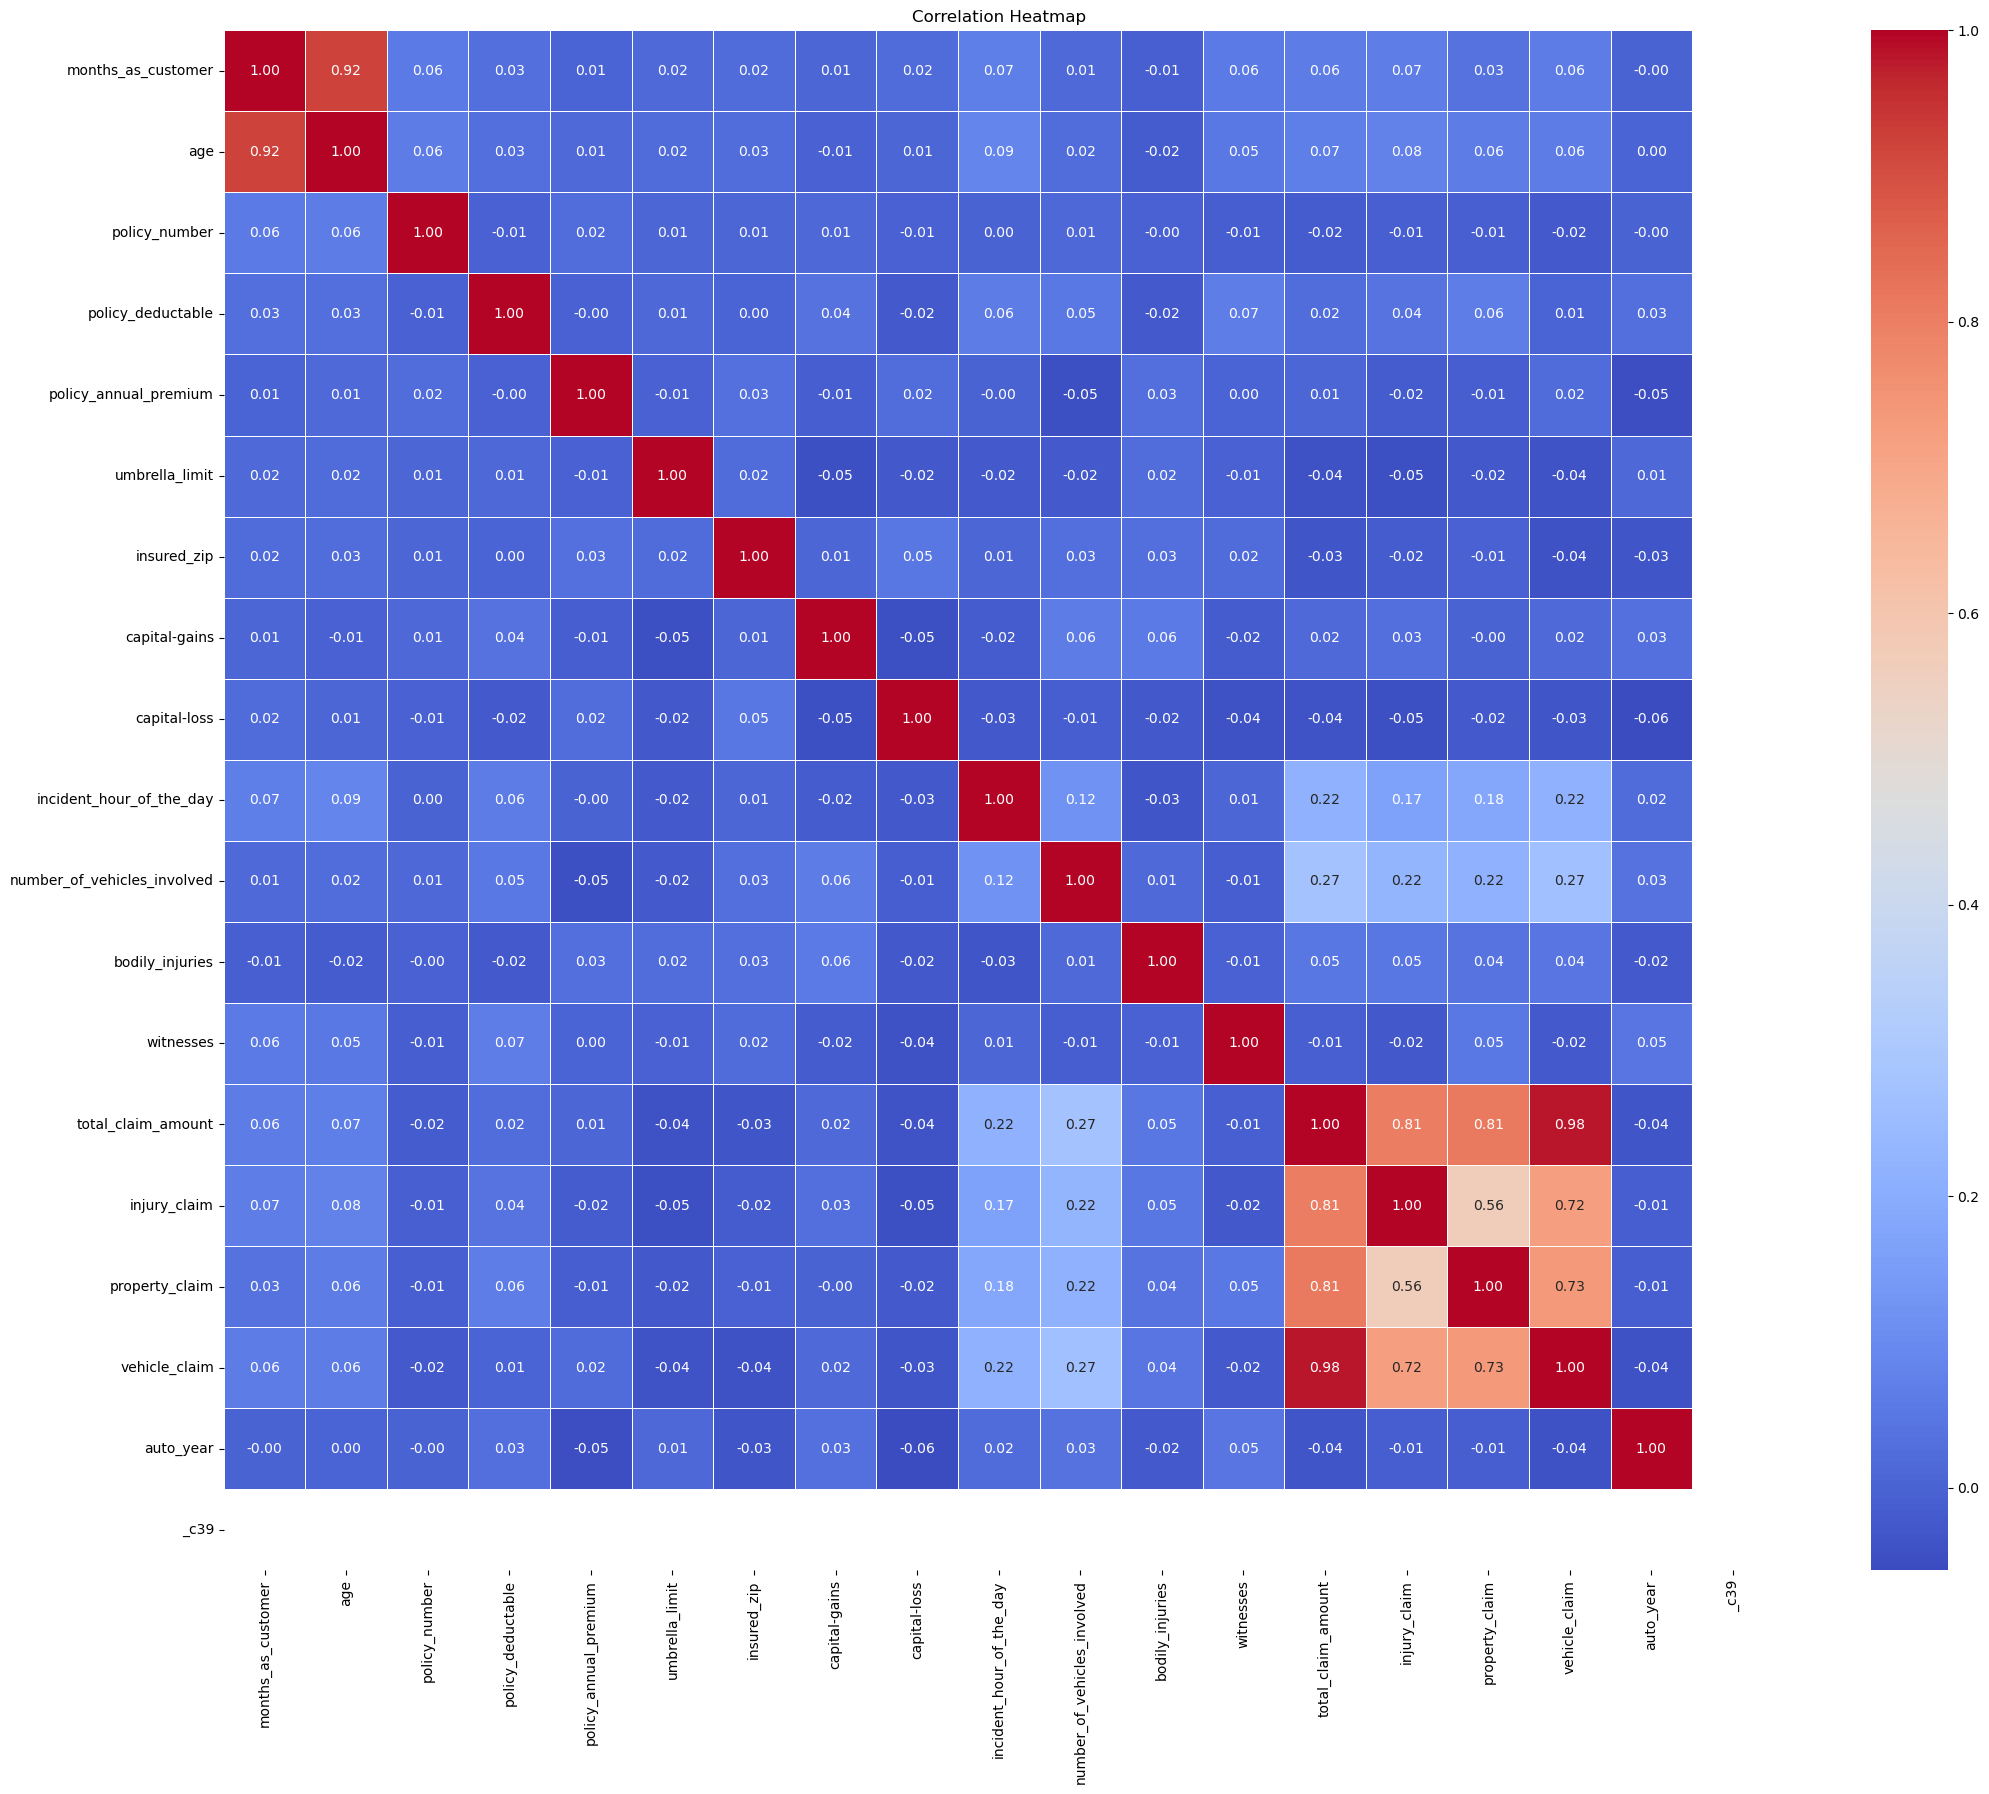

In [9]:
# plotting correlation matrix


corr_mat = data.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

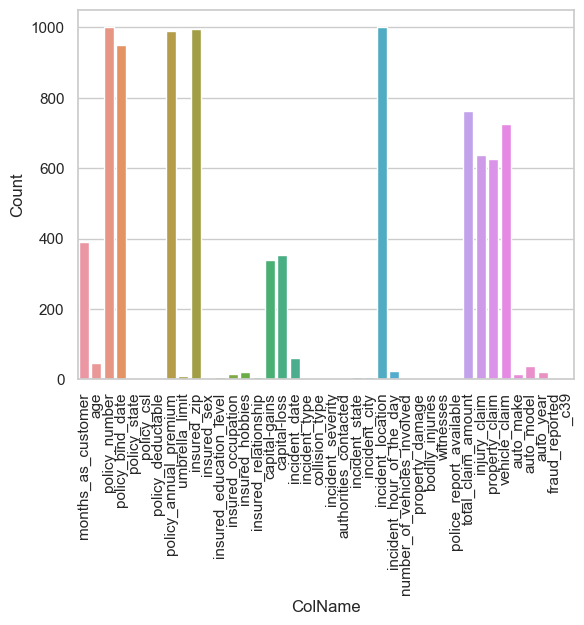

In [10]:
unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [12]:
unique.sort_values(by='Count',ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


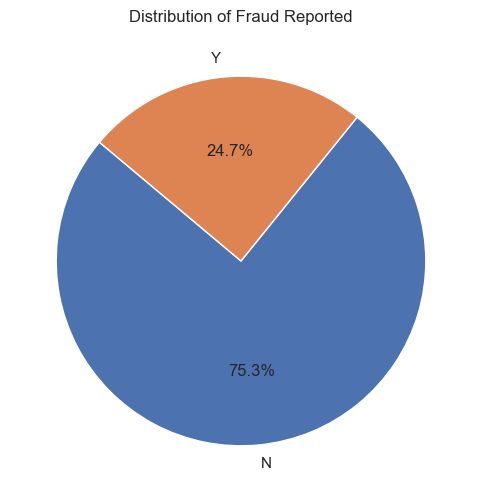

Fraud Reported Counts:
N    753
Y    247
Name: fraud_reported, dtype: int64

Fraud Reported Percentage:
N    75.3
Y    24.7
Name: fraud_reported, dtype: float64


In [13]:

fraud_reported_counts = data['fraud_reported'].value_counts()

# Plot the distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_reported_counts, labels=fraud_reported_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud Reported')
plt.show()

# Print the value counts and percentage
print(f"Fraud Reported Counts:\n{fraud_reported_counts}")
print("\nFraud Reported Percentage:")
print(fraud_reported_counts / len(data) * 100)



In [14]:
# Drop Columns that are not used in our project
not_useful_columns = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

data.drop(not_useful_columns, inplace = True, axis = 1)

In [15]:
data.head()


ColName,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


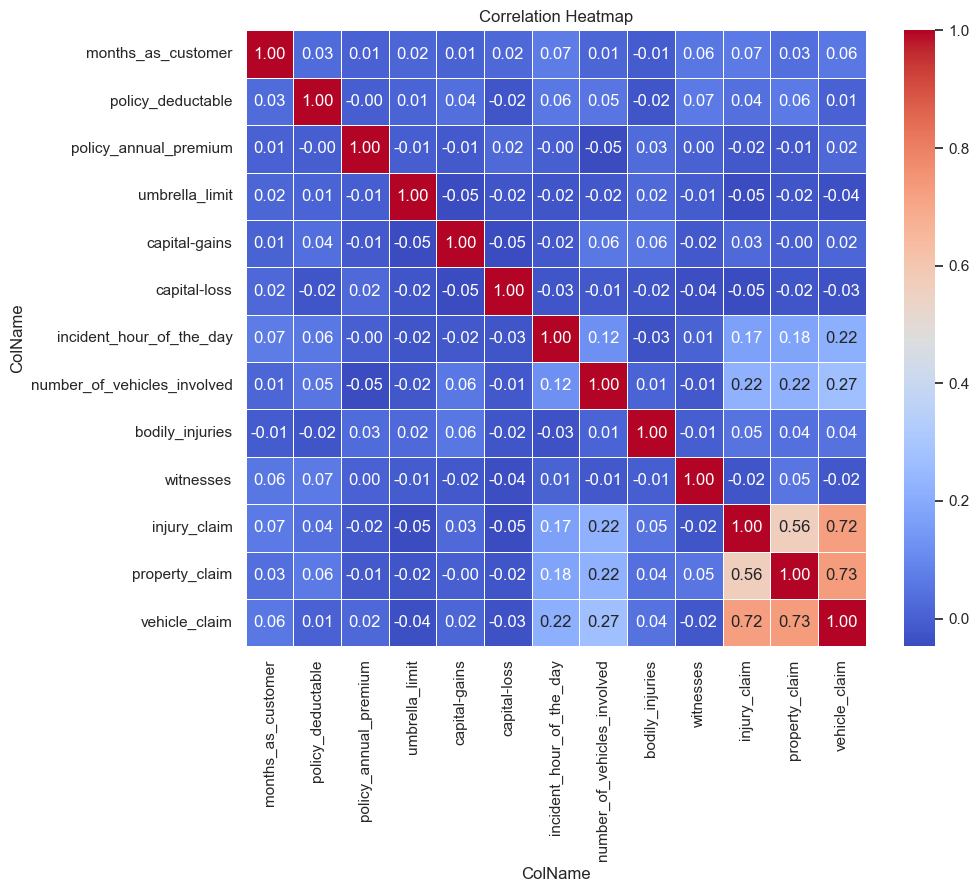

In [20]:
correlation_matrix = data.corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### High Correlation in 'age' and 'month_as_customer' columns, along with columns like - 'total_claim_amount','injury_claim','property_claim', 'vehicle_claim'. So i am removing columns 'age' and 'total_claim_amount' 

In [21]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

KeyError: "['age', 'total_claim_amount'] not found in axis"

In [22]:
data.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [23]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

print([numerical_columns])

[ColName  months_as_customer  policy_deductable  policy_annual_premium  \
0                       328               1000                1406.91   
1                       228               2000                1197.22   
2                       134               2000                1413.14   
3                       256               2000                1415.74   
4                       228               1000                1583.91   
..                      ...                ...                    ...   
995                       3               1000                1310.80   
996                     285               1000                1436.79   
997                     130                500                1383.49   
998                     458               2000                1356.92   
999                     456               1000                 766.19   

ColName  umbrella_limit  capital-gains  capital-loss  \
0                     0          53300             0   
1         

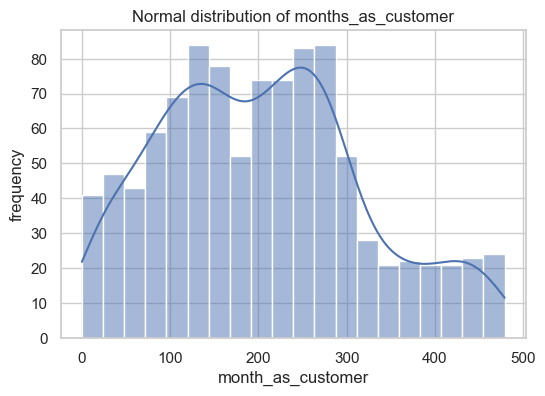

In [19]:
plt.figure(figsize = (6, 4))

sns.histplot(data['months_as_customer'], kde = True, bins = 20)
plt.xlabel('month_as_customer')
plt.ylabel('frequency')
plt.title('Normal distribution of months_as_customer')
plt.show()

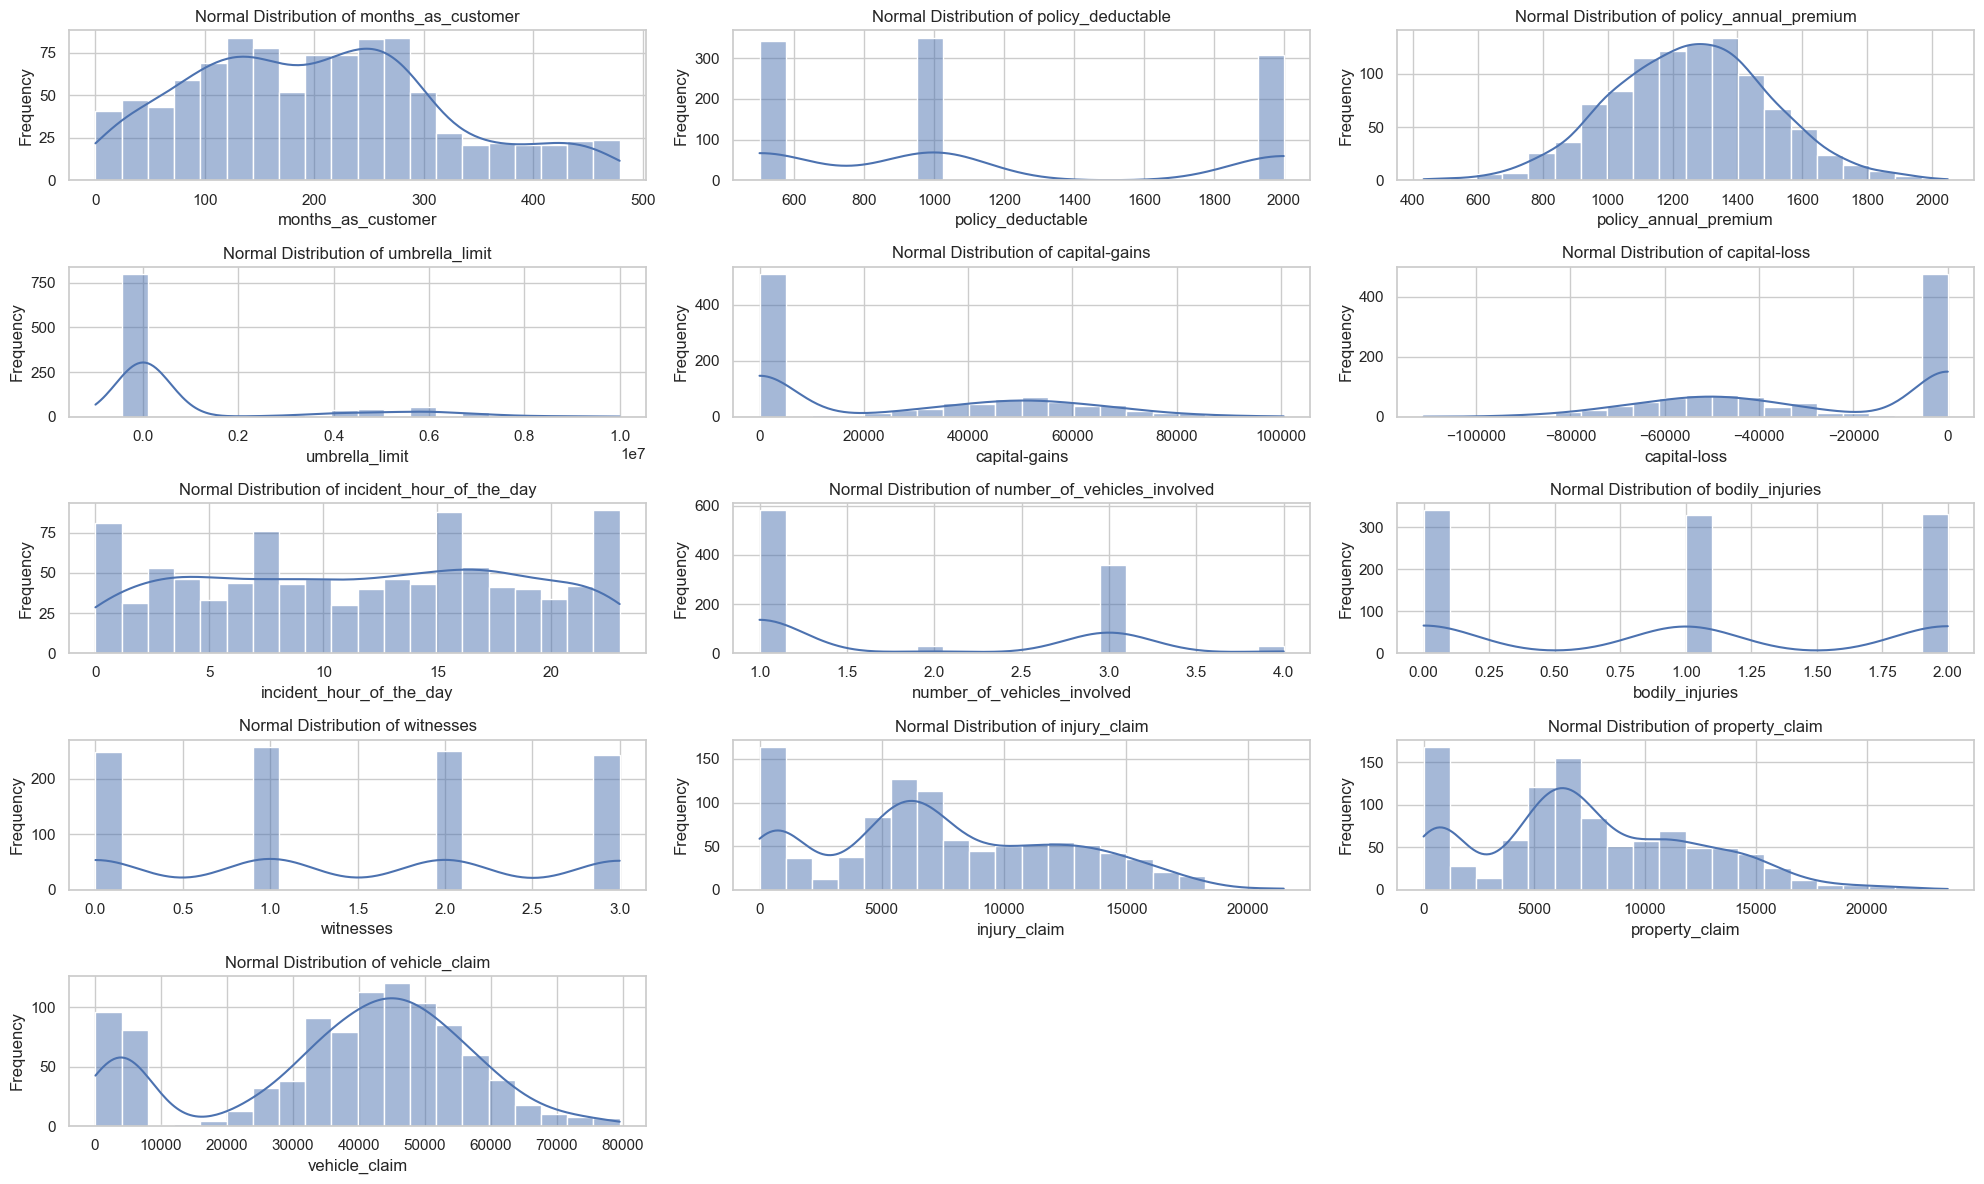

In [20]:

# Plot normal distribution plots for each numerical feature
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(5,3, i)
    sns.histplot(numerical_columns[col], kde=True, bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Normal Distribution of {col}')
plt.tight_layout()
plt.show()



In [24]:
# Get Target and Indpendent Features Seperated
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [25]:
# Converting Label Columns into Numerical by doing One-Encoding
categorical_cols = X.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [26]:
numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col, categorical_cols], axis = 1)


In [27]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,0,0,0,1,0,1,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,0,0,1,0,0,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,0,0,0,1,1,0,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,1,0,0,1,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,1,0,0,1,0,1,0


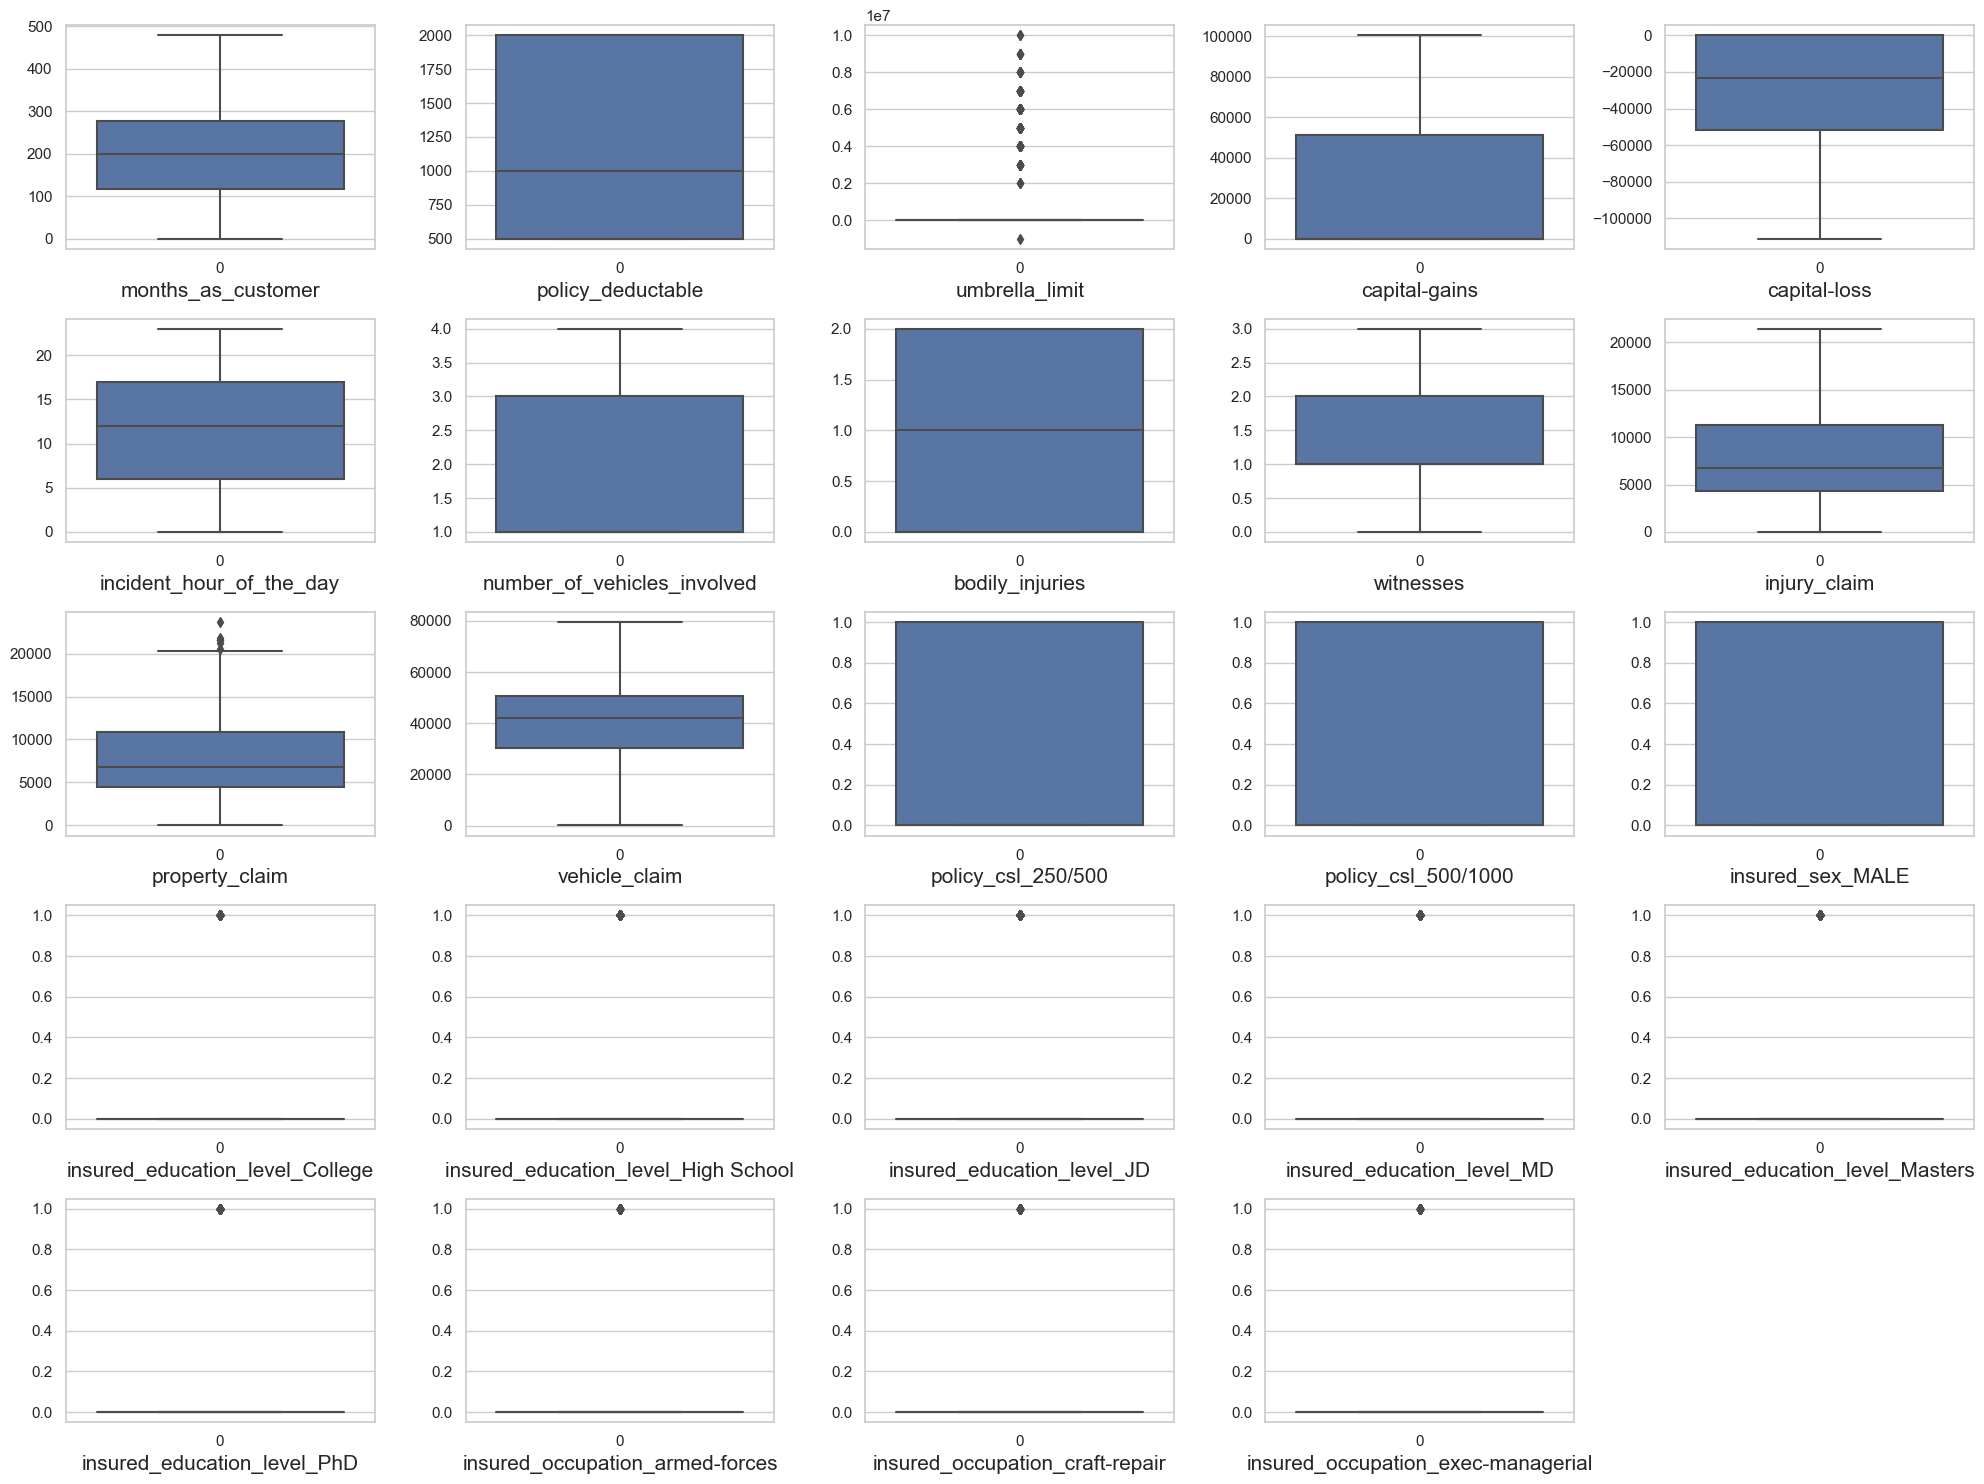

In [28]:
# Outlier Check

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

## Handling the outliers using Standard Scaler

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
980,245,1000,0,39300,0,12,1,0,2,7470,...,0,0,0,0,0,0,0,1,0,1
972,232,2000,0,25800,0,22,1,1,1,5540,...,0,0,1,0,0,0,0,0,0,1
875,195,1000,8000000,0,0,12,1,0,2,4420,...,0,0,0,0,0,0,1,0,1,0
588,472,500,0,0,0,13,1,2,3,14180,...,0,0,1,0,0,0,1,0,1,0
276,296,2000,0,53100,-63400,9,3,1,2,7120,...,1,0,0,0,0,0,0,1,1,0


In [32]:
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [34]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
980,0.343824,-0.228193,-0.496422,0.506210,0.969532,0.024222,-0.793992,-1.181114,0.448652,0.004302,0.022654,1.551188
972,0.231842,1.401760,-0.496422,0.023899,0.969532,1.465980,-0.793992,0.022467,-0.448652,-0.394630,0.790903,0.041791
875,-0.086875,-0.228193,2.979109,-0.897852,0.969532,0.024222,-0.793992,-1.181114,0.448652,-0.626134,-0.626420,-0.139655
588,2.299197,-1.043170,-0.496422,-0.897852,0.969532,0.168397,-0.793992,1.226048,1.345955,1.391262,-0.058214,0.617431
276,0.783137,1.401760,-0.496422,0.999239,-1.282737,-0.408306,1.177843,0.022467,0.448652,-0.068043,-0.051829,0.628572


In [35]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [36]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [37]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
980,0.343824,-0.228193,-0.496422,0.506210,0.969532,0.024222,-0.793992,-1.181114,0.448652,0.004302,...,0,0,0,0,0,0,0,1,0,1
972,0.231842,1.401760,-0.496422,0.023899,0.969532,1.465980,-0.793992,0.022467,-0.448652,-0.394630,...,0,0,1,0,0,0,0,0,0,1
875,-0.086875,-0.228193,2.979109,-0.897852,0.969532,0.024222,-0.793992,-1.181114,0.448652,-0.626134,...,0,0,0,0,0,0,1,0,1,0
588,2.299197,-1.043170,-0.496422,-0.897852,0.969532,0.168397,-0.793992,1.226048,1.345955,1.391262,...,0,0,1,0,0,0,1,0,1,0
276,0.783137,1.401760,-0.496422,0.999239,-1.282737,-0.408306,1.177843,0.022467,0.448652,-0.068043,...,1,0,0,0,0,0,0,1,1,0


# TRAINING AND MODELING


# Support Vector Classifier

In [38]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.852
Testing Accuracy:  0.776
[[194   0]
 [ 56   0]]
              precision    recall  f1-score   support

           N       0.78      1.00      0.87       194
           Y       0.00      0.00      0.00        56

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.78      0.68       250



## K-Nearest Neighborhood

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_train_acc)
print("Testing Accuracy: ", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
dt_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ",dt_train_acc)
print("Test accuracy: ",dt_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.604
[[135  59]
 [ 40  16]]
              precision    recall  f1-score   support

           N       0.77      0.70      0.73       194
           Y       0.21      0.29      0.24        56

    accuracy                           0.60       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.65      0.60      0.62       250



In [47]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dt_model, grid_params, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [48]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(base_model, param_grid, cv=5, n_jobs=-1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [42]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(base_model, param_grid, cv=5, n_jobs=-1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [129]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(base_model, param_grid, cv=5, n_jobs=-1, verbose = 1)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Unexpected exception formatting exception. Falling back to standard exception


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\rehan\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\rehan\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute '_passthrough_scorer' on <module 'sklearn.metrics._scorer' from 'C:\\Users\\rehan\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\_scorer.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\rehan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rehan\AppData\Local\Temp\ipykernel_7580\2134849546.py", line 12, in <module>
    grid_search.fit(X_train, y_train)
  File "C:\Us

In [49]:
# Get the best parameters
best_params = grid_search.best_params_

In [50]:



best_model = DecisionTreeClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", best_params)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Confusion Matrix:
 [[178  16]
 [ 47   9]]

Classification Report:
               precision    recall  f1-score   support

           N       0.79      0.92      0.85       194
           Y       0.36      0.16      0.22        56

    accuracy                           0.75       250
   macro avg       0.58      0.54      0.54       250
weighted avg       0.69      0.75      0.71       250



In [51]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.7506666666666667


In [52]:
decision_tree_model = grid_search.best_estimator_
y_pred = dt_model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8986666666666666
Test accuracy of Decision Tree is : 0.604
[[135  59]
 [ 40  16]]
              precision    recall  f1-score   support

           N       0.77      0.70      0.73       194
           Y       0.21      0.29      0.24        56

    accuracy                           0.60       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.65      0.60      0.62       250



## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ", rf_model_train_acc)
print("Test accuracy: ", rf_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.732
[[149  45]
 [ 22  34]]
              precision    recall  f1-score   support

           N       0.87      0.77      0.82       194
           Y       0.43      0.61      0.50        56

    accuracy                           0.73       250
   macro avg       0.65      0.69      0.66       250
weighted avg       0.77      0.73      0.75       250



## Ada Boost Classifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(base_estimator = dt_model)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    }

grid_search = GridSearchCV(ada_model, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [58]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 1, 'n_estimators': 180}
0.7146666666666668


In [60]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)

In [61]:
ada_train_acc = accuracy_score(y_train, ada_model.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 1.0
Test accuracy of Ada Boost is : 0.656
[[130  64]
 [ 22  34]]
              precision    recall  f1-score   support

           N       0.86      0.67      0.75       194
           Y       0.35      0.61      0.44        56

    accuracy                           0.66       250
   macro avg       0.60      0.64      0.60       250
weighted avg       0.74      0.66      0.68       250



## Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9346666666666666
Test Accuracy of Gradient Boosting Classifier is 0.316 

Confusion Matrix :- 
[[ 29 165]
 [  6  50]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.83      0.15      0.25       194
           Y       0.23      0.89      0.37        56

    accuracy                           0.32       250
   macro avg       0.53      0.52      0.31       250
weighted avg       0.70      0.32      0.28       250



## XgBoost Classifier

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [64]:
y_test = le.fit_transform(y_test)

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [66]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.62
[[115  79]
 [ 16  40]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       194
           1       0.34      0.71      0.46        56

    accuracy                           0.62       250
   macro avg       0.61      0.65      0.58       250
weighted avg       0.76      0.62      0.65       250



In [67]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [68]:
xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [83]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.64
[[124  71]
 [ 19  36]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.73       195
           1       0.34      0.65      0.44        55

    accuracy                           0.64       250
   macro avg       0.60      0.65      0.59       250
weighted avg       0.75      0.64      0.67       250

